In [134]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# For Data extraction
from sklearn.model_selection import train_test_split

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno
from scipy.stats import skewnorm

#Common model helpers
from sklearn import impute, metrics, model_selection, neighbors, preprocessing, forest

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Extraction

In [136]:
#Reading the csv file in variable 
df_stroke = pd.read_csv('/content/drive/MyDrive/data_sets/healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [137]:
#get the size of dataframe
df_stroke.shape

(5110, 12)

##Initial data checking

In [138]:
df_stroke.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [139]:
#programming type that the variable are encoded in 
df_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Splitting: Train, Test and Validate Split


In [140]:
from copy import deepcopy

# First we will split that data into intermediate and test
# We will not use the intermediate for anything other than getting the training and validation sets :

# We will now use the train-test splitter inside the SKLearn package to give us two subsets of data
# one for training and one for testing , diviedinto the features (the X values) and the targets (the Y values)
# the \ allows us to have a line break in the code.


stroke_X_intermediate, stroke_X_test, stroke_Y_intermediate, stroke_Y_test =  \
  model_selection.train_test_split(df_stroke.drop(labels=["stroke"], axis='columns'), 
                                   df_stroke["stroke"],test_size=0.10, random_state=42)


In [141]:
# Further splitting intermidate into training and validation
stroke_X_train, stroke_X_validate, stroke_Y_train, stroke_Y_validate =  \
  model_selection.train_test_split(stroke_X_intermediate, stroke_Y_intermediate, test_size=0.1, random_state=42)
  
# The dataframe with all our training data
# we will use this for EDA
# and model building
df_stroke_train = deepcopy(stroke_X_train)
df_stroke_train["stroke"] = stroke_Y_train

# The dataframe with all our validate data
# we will save this for later

df_stroke_validate = deepcopy(stroke_X_validate)
df_stroke_validate["stroke"] = stroke_Y_validate


# The dataframe with all our test data
# we will save this for later
df_stroke_test = deepcopy(stroke_X_test)
df_stroke_test["stroke"] = stroke_Y_test


In [142]:
# Let's take a look at the first 5 records
stroke_X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1108,56734,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown
3684,25676,Female,7.0,0,0,No,children,Rural,89.38,19.0,Unknown
3419,39017,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked
3443,2730,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked
31,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown


In [143]:
#checking the size of dataframe
stroke_X_train.shape

(4139, 11)

In [144]:
#checking the size of dataframe
df_stroke_train.shape

(4139, 12)

In [145]:
#checking  the size of dataframe
stroke_X_test.shape

(511, 11)

In [146]:
#checking  the size of dataframe
df_stroke_test.shape

(511, 12)

In [147]:
#checking the size of dataframe
stroke_X_validate.shape

(460, 11)

In [148]:
#get the size of dataframe
df_stroke_validate.shape

(460, 12)

## Exploratory Data Analysis

####Univariate Analysing the target variables

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


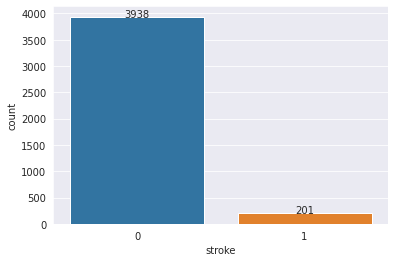

In [149]:
# to setup dark grid to all visualisation
sns.set_style("darkgrid")
stroke = sns.countplot(df_stroke_train['stroke'])
#patches - to create counts on each plot
for p in stroke.patches:
    height = p.get_height()
    stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

####Univariate Analysing the feature variables

In [150]:
df_stroke_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


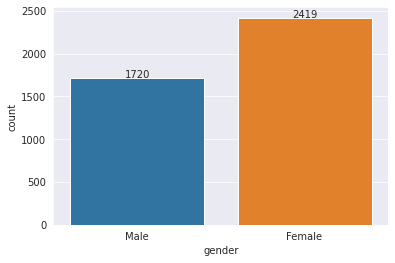

In [151]:
sns.set_style("darkgrid")
gender = sns.countplot(df_stroke_train['gender'])
#patches - to create counts on each plot
for p in gender.patches:
    height = p.get_height()
    gender.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    4139.000000
mean       43.328002
std        22.733361
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

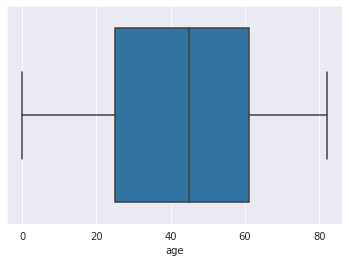

In [152]:
sns.boxplot(df_stroke_train['age'])
df_stroke_train['age'].describe()

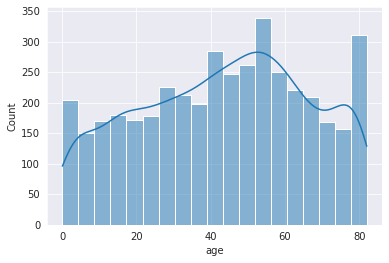

In [153]:
sns.histplot(df_stroke_train['age'],  kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

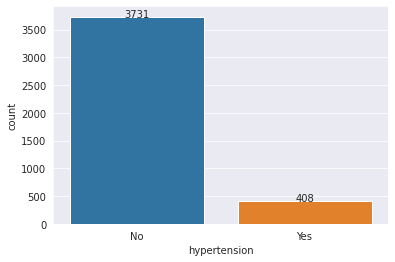

In [154]:
hypertension = sns.countplot(df_stroke_train['hypertension'])
#patches - to create counts on each plot
for p in hypertension.patches:
    height = p.get_height()
    hypertension.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
hypertension.set_xticklabels(labels=['No', 'Yes'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

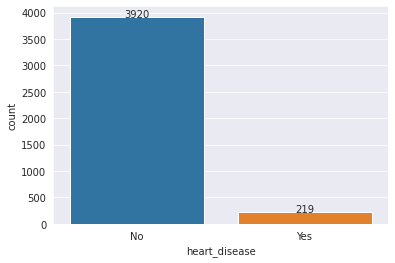

In [155]:
heart_disease = sns.countplot(df_stroke_train['heart_disease'])
#patches - to create counts on each plot
for p in heart_disease.patches:
    height = p.get_height()
    heart_disease.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
heart_disease.set_xticklabels(labels=['No', 'Yes'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


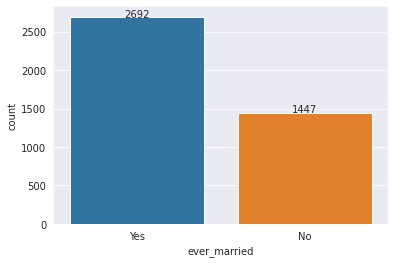

In [156]:
ever_married = sns.countplot(df_stroke_train['ever_married'])
#patches - to create counts on each plot
for p in ever_married.patches:
    height = p.get_height()
    ever_married.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


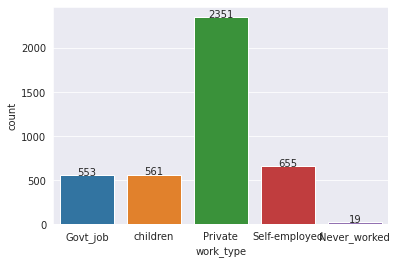

In [157]:
work_type = sns.countplot(df_stroke_train['work_type'])
#patches - to create counts on each plot
for p in work_type.patches:
    height = p.get_height()
    work_type.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


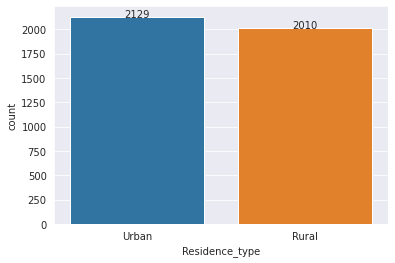

In [158]:
Residence_type = sns.countplot(df_stroke_train['Residence_type'])
#patches - to create counts on each plot
for p in Residence_type.patches:
    height = p.get_height()
    Residence_type.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    4139.000000
mean      106.273283
std        45.457825
min        55.120000
25%        77.080000
50%        91.890000
75%       114.465000
max       271.740000
Name: avg_glucose_level, dtype: float64

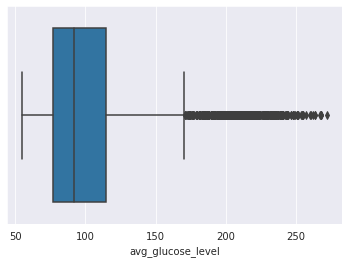

In [159]:
sns.boxplot(df_stroke_train['avg_glucose_level'])
df_stroke_train["avg_glucose_level"].describe()
#the outliers can be the true values in avg_glucose_level.

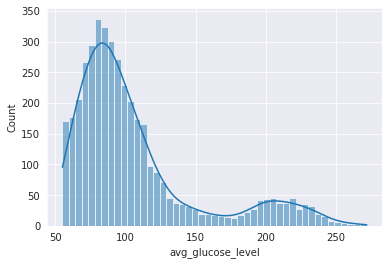

In [160]:
sns.histplot(df_stroke_train['avg_glucose_level'],  kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    3975.000000
mean       28.845736
std         7.818259
min        10.300000
25%        23.500000
50%        27.900000
75%        33.000000
max        97.600000
Name: bmi, dtype: float64

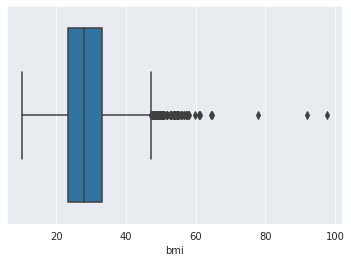

In [161]:
sns.boxplot(df_stroke_train['bmi'])
df_stroke_train["bmi"].describe()

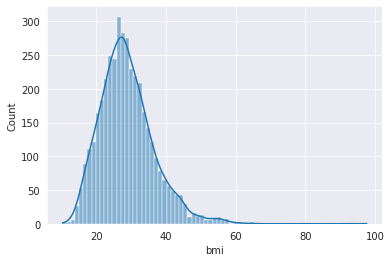

In [162]:
sns.histplot(df_stroke_train['bmi'], kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


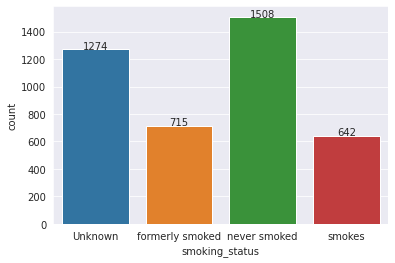

In [163]:
smoking_status = sns.countplot(df_stroke_train['smoking_status'])
#patches - to create counts on each plot
for p in smoking_status.patches:
    height = p.get_height()
    smoking_status.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

####Multivarite Analysis of the relationship between feature and target variables

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


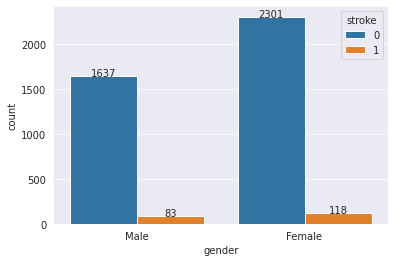

In [164]:
gender_vs_stroke = sns.countplot(df_stroke_train["gender"], hue=df_stroke_train["stroke"])
#patches - to create counts on each plot
for p in gender_vs_stroke.patches:
    height = p.get_height()
    gender_vs_stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

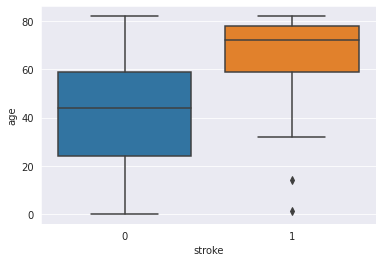

In [165]:
sns.boxplot(data=df_stroke_train, x="stroke", y="age")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


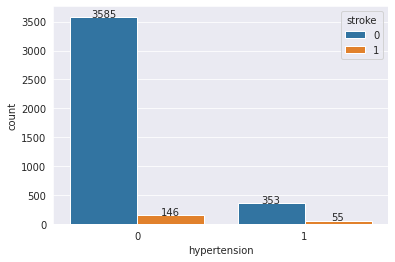

In [166]:
hypertension_vs_stroke = sns.countplot(df_stroke_train["hypertension"], hue=df_stroke_train["stroke"])
#patches - to create counts on each plot
for p in hypertension_vs_stroke.patches:
    height = p.get_height()
    hypertension_vs_stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


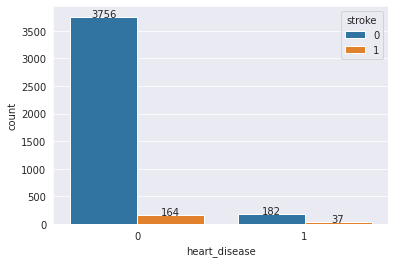

In [167]:
heart_disease_vs_stroke = sns.countplot(df_stroke_train["heart_disease"], hue=df_stroke_train["stroke"])
#patches - to create counts on each plot
for p in heart_disease_vs_stroke.patches:
    height = p.get_height()
    heart_disease_vs_stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


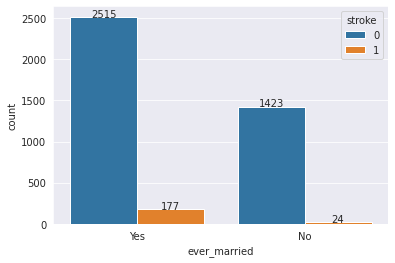

In [168]:
martial_vs_stroke = sns.countplot(df_stroke_train["ever_married"], hue=df_stroke_train["stroke"])
#patches - to create counts on each plot
for p in martial_vs_stroke.patches:
    height = p.get_height()
    martial_vs_stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


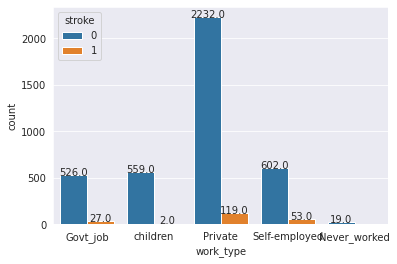

In [169]:
work_vs_stroke = sns.countplot(df_stroke_train["work_type"], hue=df_stroke_train["stroke"])
#patches - to create counts on each plot
for p in work_vs_stroke.patches:
    height = p.get_height()
    work_vs_stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


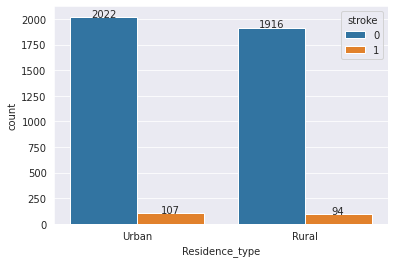

In [170]:
residence_vs_stroke = sns.countplot(df_stroke_train["Residence_type"], hue=df_stroke_train["stroke"])
#patches - to create counts on each plot
for p in residence_vs_stroke.patches:
    height = p.get_height()
    residence_vs_stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

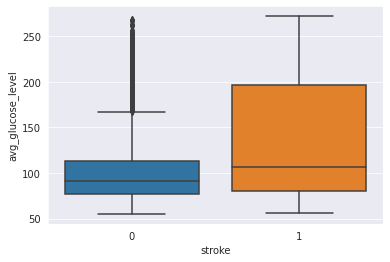

In [171]:
sns.boxplot(data=df_stroke_train, x="stroke", y="avg_glucose_level")

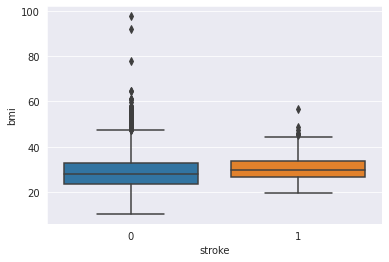

In [172]:
sns.boxplot(data=df_stroke_train, x="stroke", y="bmi")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


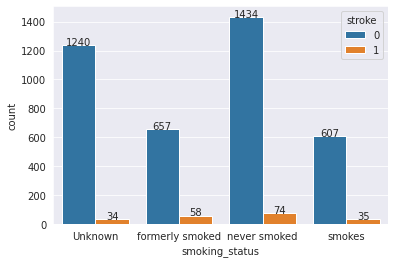

In [173]:
smoke_vs_stroke = sns.countplot(df_stroke_train["smoking_status"], hue=df_stroke_train["stroke"])
#patches - to create counts on each plot
for p in smoke_vs_stroke.patches: 
    height = p.get_height()
    smoke_vs_stroke.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

###Analysis of the relationship between feature and feature variables

In [174]:
features_corr_check= ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

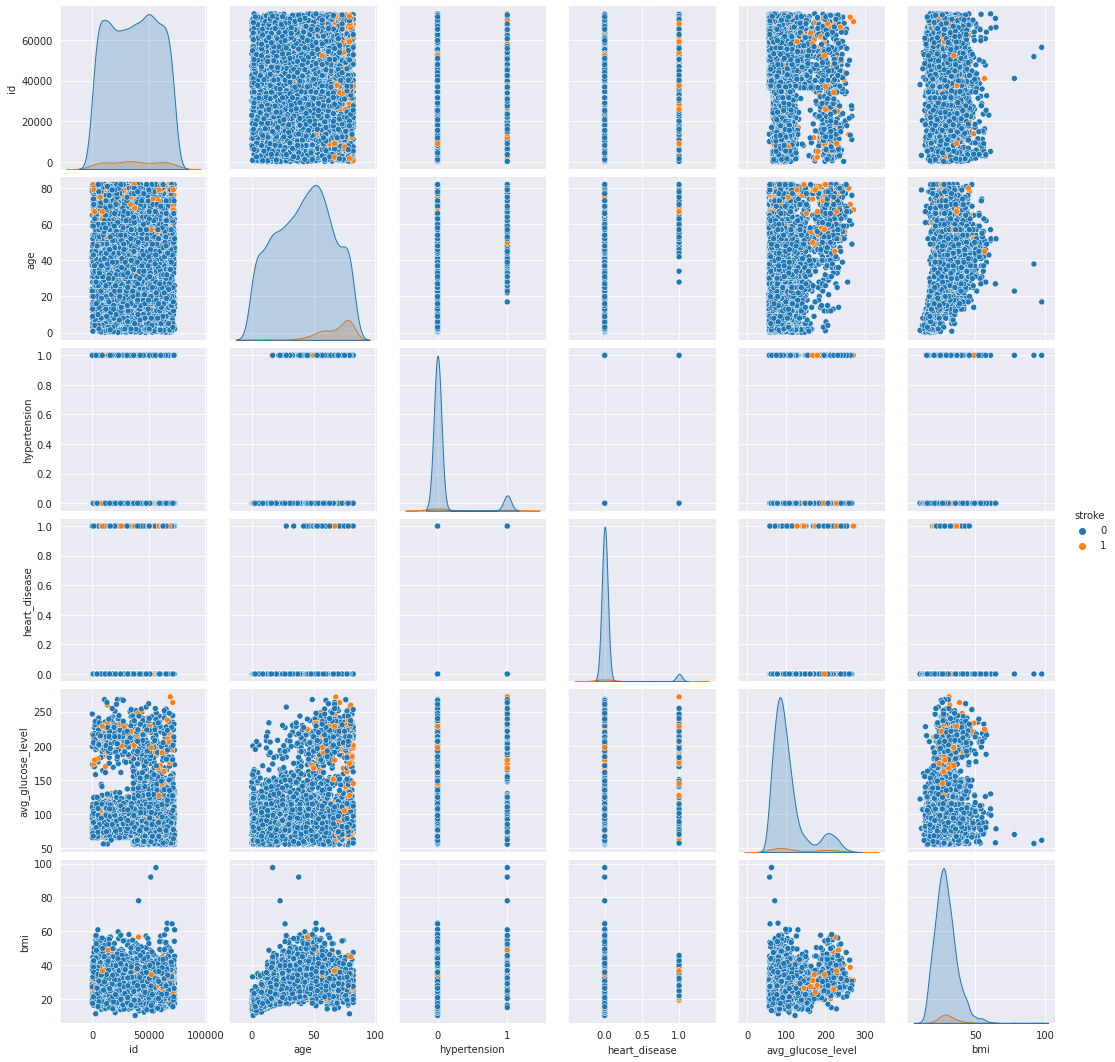

In [175]:
#to create pair plot of numerical features
sns.pairplot(df_stroke_train, hue='stroke')

In [176]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = df_stroke_train.select_dtypes(include=numerics).columns
num_cols

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [177]:
# We can find the pairwise correlation of all attributes in the dataframe by using the corr method
# We will select pearson correlation to see if there are any simple
# linear relationships that can be identified amongst variables
df_stroke_train_corr = df_stroke_train.corr(method='pearson')
df_stroke_train_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.002866,-0.003324,-0.006820,-0.007898,0.007094,0.005913
age,-0.002866,1.000000,0.275350,0.264527,0.241258,0.329668,0.244147
hypertension,-0.003324,0.275350,1.000000,0.110112,0.182588,0.172786,0.132676
heart_disease,-0.006820,0.264527,0.110112,1.000000,0.160357,0.034347,0.132379
avg_glucose_level,-0.007898,0.241258,0.182588,0.160357,1.000000,0.176462,0.135428
bmi,0.007094,0.329668,0.172786,0.034347,0.176462,1.000000,0.044284
stroke,0.005913,0.244147,0.132676,0.132379,0.135428,0.044284,1.000000


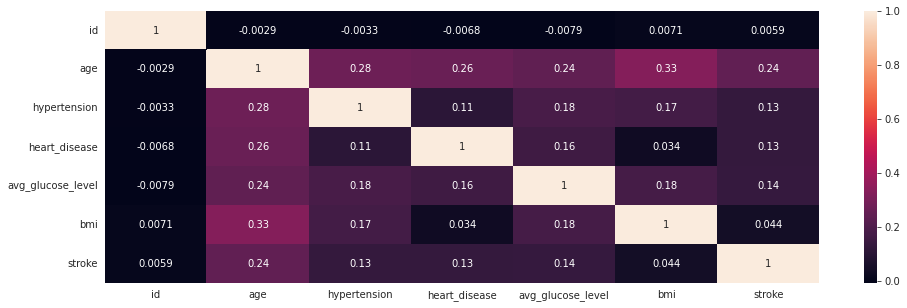

In [178]:
#Visualising heatmap of feature and target variable
plt.figure(figsize = (16,5))
sns.heatmap(df_stroke_train_corr,annot=True)

##Pre-processing for training

#### Drop id column

In [179]:
#Check data frame before dropping id column
df_stroke_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1108,56734,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown,0
3684,25676,Female,7.0,0,0,No,children,Rural,89.38,19.0,Unknown,0
3419,39017,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0
3443,2730,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
31,33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2777,15533,Male,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0
2492,65324,Female,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,Unknown,0
3625,40210,Male,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0
2136,59745,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0


In [180]:
#dropping id column from the training data
df_stroke_train = df_stroke_train.drop("id",axis=1)

In [181]:
#checking dataframe after drop
df_stroke_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1108,Male,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown,0
3684,Female,7.0,0,0,No,children,Rural,89.38,19.0,Unknown,0
3419,Female,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0
3443,Male,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0
31,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
2777,Male,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0
2492,Female,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,Unknown,0
3625,Male,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0
2136,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0


####Encoding of nominal / categorical features

In [182]:
def create_dummies(df, column_name,drop_first=False):
  # Get the binary encodings for the columns
  temp_dummies = pd.get_dummies(df[column_name],drop_first=drop_first)#drop_first is used to help in reducing the extra column created during dummy variable creation which reduces the correlations created among dummy variables
  temp_df = df.drop(labels=[column_name], axis='columns')
  return temp_df.join(temp_dummies)

In [183]:
#initial checking of feature - gender
df_stroke['gender']

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

In [184]:
# creating dummy variable of gender
df_stroke_train = create_dummies(df_stroke_train, 'gender')

In [185]:
#checking the data frame
df_stroke_train

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
1108,33.0,0,0,Yes,Govt_job,Urban,82.83,25.4,Unknown,0,0,1
3684,7.0,0,0,No,children,Rural,89.38,19.0,Unknown,0,1,0
3419,72.0,0,0,Yes,Govt_job,Rural,118.22,21.9,formerly smoked,0,1,0
3443,58.0,0,0,Yes,Private,Urban,94.53,36.1,never smoked,0,0,1
31,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,No,Private,Urban,107.59,26.2,formerly smoked,0,0,1
2492,48.0,0,0,Yes,Govt_job,Rural,75.91,27.8,Unknown,0,1,0
3625,78.0,0,1,Yes,Self-employed,Rural,206.62,28.0,formerly smoked,0,0,1
2136,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0,1,0


In [186]:
# creating dummy variable of work type
df_stroke_train = create_dummies(df_stroke_train, 'work_type')

In [187]:
# creating dummy variable of residence type
df_stroke_train = create_dummies(df_stroke_train, 'Residence_type')

In [188]:
# creating dummy variable of smoking status
df_stroke_train = create_dummies(df_stroke_train, 'smoking_status')

In [189]:
# creating dummy variable of martial status
df_stroke_train = create_dummies(df_stroke_train, 'ever_married')
#renaming column to make it easy to understand
df_stroke_train.rename(columns= {"Yes" : "married"})


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,married
1108,33.0,0,0,82.83,25.4,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [190]:
#renaming column to make it easy to understand
df_stroke_train.rename(columns= {"No" : "Not married"})

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,Not married,Yes
1108,33.0,0,0,82.83,25.4,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


####Dealing with Missing Data in the Training set

In [191]:
# the info method often gives us more information
# Including the amount of non-null values for each variable
stroke_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4139 entries, 1108 to 3595
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4139 non-null   int64  
 1   gender             4139 non-null   object 
 2   age                4139 non-null   float64
 3   hypertension       4139 non-null   int64  
 4   heart_disease      4139 non-null   int64  
 5   ever_married       4139 non-null   object 
 6   work_type          4139 non-null   object 
 7   Residence_type     4139 non-null   object 
 8   avg_glucose_level  4139 non-null   float64
 9   bmi                3975 non-null   float64
 10  smoking_status     4139 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 517.1+ KB


In [192]:
#checking the total number of missing value in specific column
stroke_X_train.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  164
smoking_status         0
dtype: int64

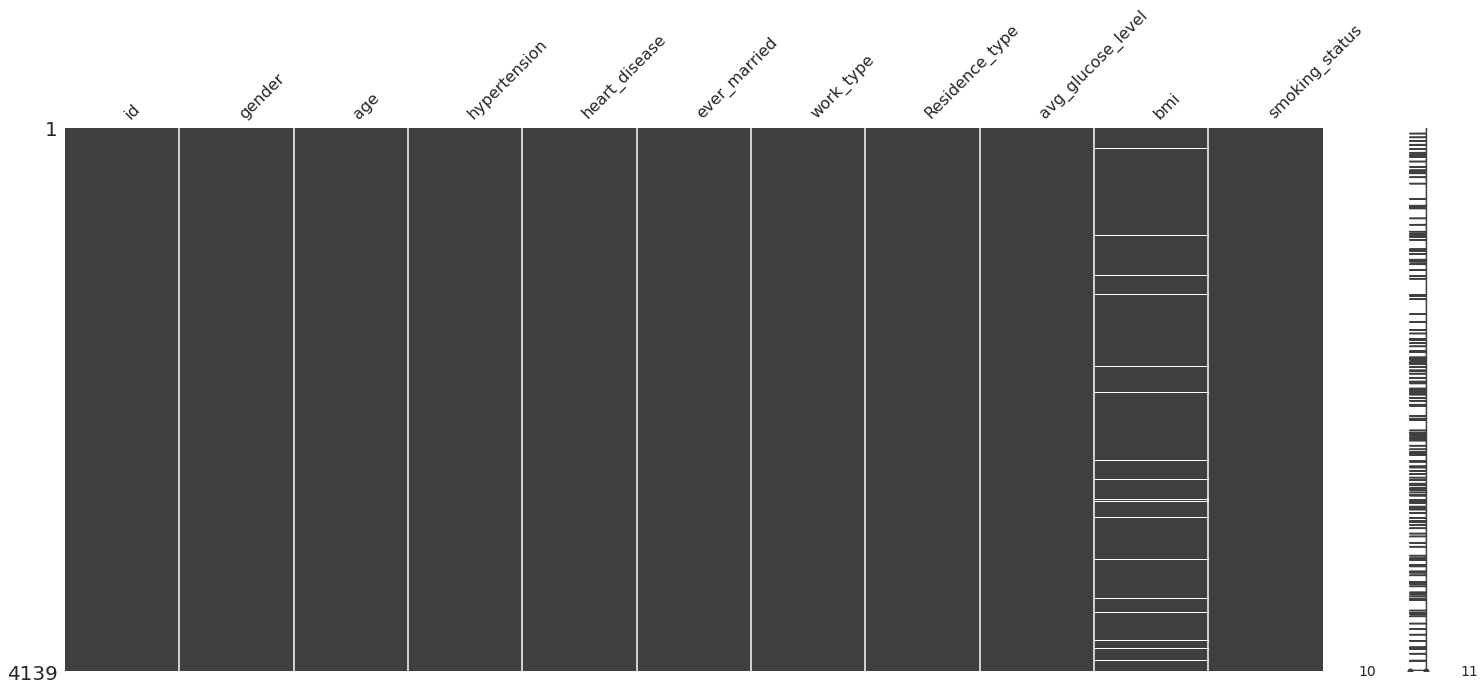

In [193]:
#using the Missingno library to provide visualisaton of our data and check for missing values
msno.matrix(stroke_X_train)

####Imputation for missing values

In [194]:
# Simple Imputer is Univariate imputer for completing missing values with simple strategies.

# Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value
# here we replacing the missing bmi value using mean with the help of dimple imputer 
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
def impute_attribute(df, column, imputer=imputer):
  imputer = imputer.fit(df[[column]])
  return imputer.transform(df[[column]]), imputer

In [195]:
df_stroke_train['bmi'], bmi_imputer = impute_attribute(df_stroke_train,'bmi')
df_stroke_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
1108,33.0,0,0,82.83,25.4,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [196]:
#checking the number of null values in training set after imputing 
#to confirm that the imputation is done correctly
df_stroke_train.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Female               0
Male                 0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
No                   0
Yes                  0
dtype: int64

##Model training

In [197]:
# Our features
stroke_X_train = df_stroke_train.drop(labels=["stroke"], axis=1)
# Our target
stroke_Y_train = df_stroke_train["stroke"]
stroke_X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
1108,33.0,0,0,82.83,25.4,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
3684,7.0,0,0,89.38,19.0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0
3419,72.0,0,0,118.22,21.9,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3443,58.0,0,0,94.53,36.1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
31,42.0,0,0,83.41,25.4,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,46.0,0,0,107.59,26.2,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2492,48.0,0,0,75.91,27.8,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3625,78.0,0,1,206.62,28.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
2136,27.0,0,0,76.74,53.9,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [198]:
# using the info method which often gives us more information
# Including the amount of non-null values for each variable
df_stroke_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4139 entries, 1108 to 3595
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4139 non-null   float64
 1   hypertension       4139 non-null   int64  
 2   heart_disease      4139 non-null   int64  
 3   avg_glucose_level  4139 non-null   float64
 4   bmi                4139 non-null   float64
 5   stroke             4139 non-null   int64  
 6   Female             4139 non-null   uint8  
 7   Male               4139 non-null   uint8  
 8   Govt_job           4139 non-null   uint8  
 9   Never_worked       4139 non-null   uint8  
 10  Private            4139 non-null   uint8  
 11  Self-employed      4139 non-null   uint8  
 12  children           4139 non-null   uint8  
 13  Rural              4139 non-null   uint8  
 14  Urban              4139 non-null   uint8  
 15  Unknown            4139 non-null   uint8  
 16  formerly smoked    41

####Making a simple decision classification forest

In [199]:
# create the model
from sklearn.ensemble import RandomForestClassifier
stroke_clf_forest = RandomForestClassifier() 
# ValueError: could not convert string to float: 'nontypical'
# fit the model
stroke_clf_forest = stroke_clf_forest.fit(stroke_X_train, stroke_Y_train)

##Model Evaluation

####Checking training result

In [200]:
#the prediction results for our classifiers, checking how well they perform on data that has already been seen (the training set)
stroke_Y_train_forest = stroke_clf_forest.predict(stroke_X_train)

####Confusion matrix

[[3938    0]
 [   0  201]]


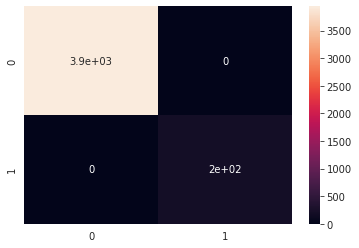

In [201]:
# we want to have a look at how well the classifiers have performed, so we will use confusion matrix
#Which will give us the amount of values for: True Positives, False Positives, True Negatives, False Negatives
stroke_cm_train_forest = metrics.confusion_matrix(stroke_Y_train,stroke_Y_train_forest)
print(stroke_cm_train_forest)
sns.heatmap(stroke_cm_train_forest, annot=True)

####Classification Accuracy score

In [202]:
stroke_acc_train_forest = metrics.accuracy_score(stroke_Y_train,stroke_Y_train_forest)
stroke_acc_train_forest

1.0

In [203]:
#We will use the classification_report function on the metrics module to get a more detailed picture of our classification score
print("forest classification:\n%s" % metrics.classification_report(stroke_Y_train, stroke_Y_train_forest))

Tree classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3938
           1       1.00      1.00      1.00       201

    accuracy                           1.00      4139
   macro avg       1.00      1.00      1.00      4139
weighted avg       1.00      1.00      1.00      4139



##Pre-processing for validation set

#### Drop id column

In [204]:
#dropping id column from the training data
df_stroke_validate = df_stroke_validate.drop("id",axis=1)

####Encoding of nominal/categorical features

In [205]:
def create_dummies(df, column_name,drop_first=False):
  # Get the binary encodings for the columns
  temp_dummies = pd.get_dummies(df[column_name],drop_first=drop_first) #drop_first is used to help in reducing the extra column created during dummy variable creation which reduces the correlations created among dummy variables
  temp_df = df.drop(labels=[column_name], axis='columns')
  return temp_df.join(temp_dummies)

In [206]:
#creating dummy variables of gender which are male and female
df_stroke_validate = create_dummies(df_stroke_validate, 'gender')

In [207]:
#creating dummy variables of work type which are govt_job, children, private, self-employed, never worked
df_stroke_validate = create_dummies(df_stroke_validate, 'work_type')

In [208]:
#creating dummy variables of residence type which are urban and rural
df_stroke_validate = create_dummies(df_stroke_validate, 'Residence_type')

In [209]:
#creating dummy variables of smoking status which are unkown, smokes, formerly smokes, never smoked
df_stroke_validate = create_dummies(df_stroke_validate, 'smoking_status')

In [210]:
#creating dummy variables of ever married which are yes and no
df_stroke_validate = create_dummies(df_stroke_validate, 'ever_married')

In [211]:
#checking all the dummy variables are created
df_stroke_validate

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4853,14.0,0,0,101.60,25.3,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2676,58.0,0,0,199.42,29.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4269,31.0,0,0,77.95,25.1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4264,65.0,0,0,66.69,21.5,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4265,40.0,0,0,122.23,30.5,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,78.0,0,0,67.29,24.6,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2767,27.0,0,0,94.19,27.4,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1321,30.0,0,0,82.56,25.4,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3402,8.0,0,0,104.30,18.5,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0


####Dealing with Missing Data in the Validation set

In [212]:
#checking the number of null values in training set after imputing 
#to confirm that the imputation is done correctly
df_stroke_validate.isna().sum()

age                   0
hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  14
stroke                0
Female                0
Male                  0
Govt_job              0
Never_worked          0
Private               0
Self-employed         0
children              0
Rural                 0
Urban                 0
Unknown               0
formerly smoked       0
never smoked          0
smokes                0
No                    0
Yes                   0
dtype: int64

####Imputation for missing values

In [213]:
df_stroke_validate['bmi'], bmi_imputer = impute_attribute(df_stroke_validate,'bmi')
df_stroke_validate

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4853,14.0,0,0,101.60,25.3,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2676,58.0,0,0,199.42,29.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4269,31.0,0,0,77.95,25.1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4264,65.0,0,0,66.69,21.5,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4265,40.0,0,0,122.23,30.5,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,78.0,0,0,67.29,24.6,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2767,27.0,0,0,94.19,27.4,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1321,30.0,0,0,82.56,25.4,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3402,8.0,0,0,104.30,18.5,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0


In [214]:
df_stroke_validate.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Female               0
Male                 0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
No                   0
Yes                  0
dtype: int64

##Model Validation

In [215]:
# Our features
stroke_X_validate = df_stroke_validate.drop(labels=["stroke"], axis=1)
# Our target
stroke_Y_validate= df_stroke_validate["stroke"]
stroke_X_validate

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4853,14.0,0,0,101.60,25.3,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0
2676,58.0,0,0,199.42,29.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4269,31.0,0,0,77.95,25.1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4264,65.0,0,0,66.69,21.5,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4265,40.0,0,0,122.23,30.5,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,78.0,0,0,67.29,24.6,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2767,27.0,0,0,94.19,27.4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1321,30.0,0,0,82.56,25.4,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3402,8.0,0,0,104.30,18.5,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0


In [216]:
# using the info method which often gives us more information
# Including the amount of non-null values for each variable
df_stroke_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 4853 to 4574
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                460 non-null    float64
 1   hypertension       460 non-null    int64  
 2   heart_disease      460 non-null    int64  
 3   avg_glucose_level  460 non-null    float64
 4   bmi                460 non-null    float64
 5   stroke             460 non-null    int64  
 6   Female             460 non-null    uint8  
 7   Male               460 non-null    uint8  
 8   Govt_job           460 non-null    uint8  
 9   Never_worked       460 non-null    uint8  
 10  Private            460 non-null    uint8  
 11  Self-employed      460 non-null    uint8  
 12  children           460 non-null    uint8  
 13  Rural              460 non-null    uint8  
 14  Urban              460 non-null    uint8  
 15  Unknown            460 non-null    uint8  
 16  formerly smoked    460

##Model Evaluation

###Checking validation result

In [217]:
#the prediction results for our classifiers, checking how well they perform on data that has already been initally unseen (the validation set)
stroke_Y_validate_forest = stroke_clf_forest.predict(stroke_X_validate)

###Confusion Matrix

[[439   1]
 [ 20   0]]


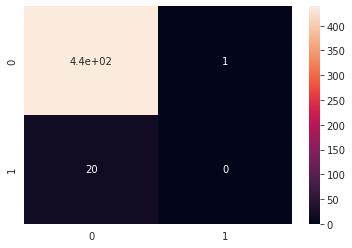

In [218]:
# we want to have a look at how well the classifiers have performed, so we will use confusion matrix
#Which will give us the amount of values for: True Positives, False Positives, True Negatives, False Negatives
stroke_cm_validate_forest = metrics.confusion_matrix(stroke_Y_validate,stroke_Y_validate_forest)
print(stroke_cm_validate_forest)
sns.heatmap(stroke_cm_validate_forest, annot=True)

###Classification Accuracy Score

In [219]:
#the validating Accuracy of our models
stroke_acc_validate_forest = metrics.accuracy_score(stroke_Y_validate,stroke_Y_validate_forest)
stroke_acc_validate_forest

0.9543478260869566

In [220]:
#We will use the classification_report function on the metrics module to get a more detailed picture of our classification score
print("forest classification:\n%s" % metrics.classification_report(stroke_Y_validate, stroke_Y_validate_forest))

Tree classification:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       440
           1       0.00      0.00      0.00        20

    accuracy                           0.95       460
   macro avg       0.48      0.50      0.49       460
weighted avg       0.91      0.95      0.93       460



##Pre-processing for testing


#### Drop id column

In [221]:
#dropping id column from the training data
df_stroke_test = df_stroke_test.drop("id",axis=1)

####Encoding of nominal/categorical features

In [222]:
#creating dummy variables of gender which are male and female
df_stroke_test = create_dummies(df_stroke_test, 'gender')

In [223]:
#creating dummy variables of work type which are govt_job, children, private, self-employed, never worked
df_stroke_test = create_dummies(df_stroke_test, 'work_type')

In [224]:
#creating dummy variables of residence type which are urban and rural
df_stroke_test = create_dummies(df_stroke_test, 'Residence_type')

In [225]:
#creating dummy variables of smoking status which are unkown, smokes, formerly smokes, never smoked
df_stroke_test = create_dummies(df_stroke_test, 'smoking_status')

In [226]:
#creating dummy variables of ever married which are yes and no
df_stroke_test = create_dummies(df_stroke_test, 'ever_married')

In [227]:
#checking all the dummy variables are created
df_stroke_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,...,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4688,31.0,0,0,64.85,23.0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4478,40.0,0,0,65.29,28.3,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
3849,8.0,0,0,74.42,22.5,0,1,0,0,0,...,0,1,0,1,1,0,0,0,1,0
4355,79.0,1,0,76.64,19.5,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3826,75.0,0,0,94.77,27.2,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1833,14.0,0,0,92.86,20.7,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3411,26.0,0,0,88.79,24.9,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
350,79.0,1,1,200.28,30.0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1


In [228]:
# using the info method which often gives us more information
# Including the amount of non-null values for each variable
stroke_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 4688 to 3413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 511 non-null    int64  
 1   gender             511 non-null    object 
 2   age                511 non-null    float64
 3   hypertension       511 non-null    int64  
 4   heart_disease      511 non-null    int64  
 5   ever_married       511 non-null    object 
 6   work_type          511 non-null    object 
 7   Residence_type     511 non-null    object 
 8   avg_glucose_level  511 non-null    float64
 9   bmi                488 non-null    float64
 10  smoking_status     511 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 64.1+ KB


####Dealing with Missing Data in the Training set

In [229]:
# using the info method which often gives us more information
# Including the amount of non-null values for each variable
stroke_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 4688 to 3413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 511 non-null    int64  
 1   gender             511 non-null    object 
 2   age                511 non-null    float64
 3   hypertension       511 non-null    int64  
 4   heart_disease      511 non-null    int64  
 5   ever_married       511 non-null    object 
 6   work_type          511 non-null    object 
 7   Residence_type     511 non-null    object 
 8   avg_glucose_level  511 non-null    float64
 9   bmi                488 non-null    float64
 10  smoking_status     511 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 64.1+ KB


In [230]:
#checking the number of null values in training set after imputing 
#to confirm that the imputation is done correctly
stroke_X_test.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  23
smoking_status        0
dtype: int64

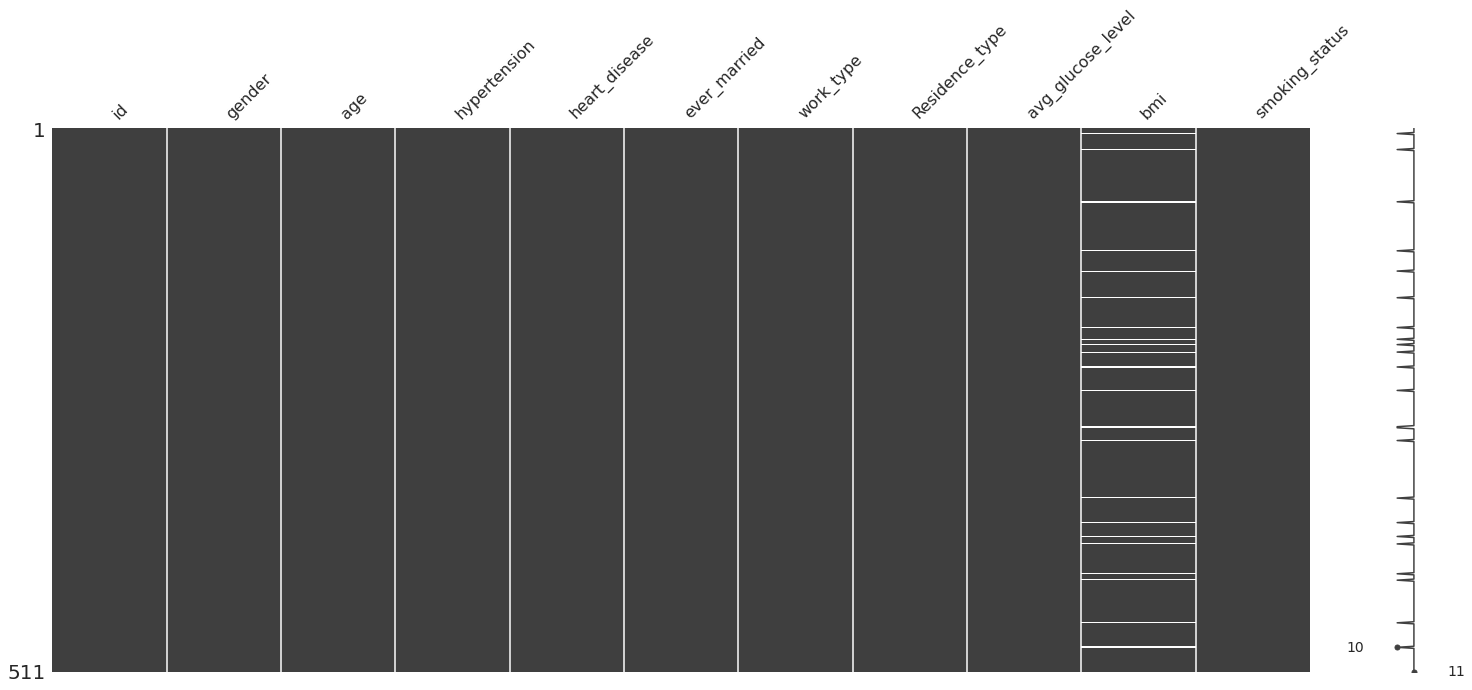

In [231]:
#using the Missingno library to provide visualisaton of our data and check for missing values
msno.matrix(stroke_X_test)

####Imputation for missing values

In [232]:
#imputing missing values
stroke_X_test ['bmi'], bmi_imputer = impute_attribute(df_stroke_test,'bmi') 
stroke_X_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,40041,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown
4478,55244,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked
3849,70992,Female,8.0,0,0,No,children,Urban,74.42,22.5,Unknown
4355,38207,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked
3826,8541,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
1833,34958,Male,14.0,0,0,No,children,Urban,92.86,20.7,formerly smoked
3411,15104,Female,26.0,0,0,Yes,Private,Rural,88.79,24.9,never smoked
350,28333,Female,79.0,1,1,Yes,Self-employed,Urban,200.28,30.0,formerly smoked


In [233]:
#checking whether the missing values of bmi are imputed
stroke_X_test.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

##Model Testing

In [234]:
# Our features
stroke_X_test = df_stroke_test.drop(labels=["stroke"], axis=1)
# Our target
stroke_Y_test = df_stroke_test["stroke"]
stroke_X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4688,31.0,0,0,64.85,23.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4478,40.0,0,0,65.29,28.3,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3849,8.0,0,0,74.42,22.5,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
4355,79.0,1,0,76.64,19.5,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3826,75.0,0,0,94.77,27.2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70.0,0,0,69.04,35.9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1833,14.0,0,0,92.86,20.7,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
3411,26.0,0,0,88.79,24.9,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
350,79.0,1,1,200.28,30.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [235]:
# using the info method which often gives us more information
# Including the amount of non-null values for each variable
df_stroke_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 4688 to 3413
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                511 non-null    float64
 1   hypertension       511 non-null    int64  
 2   heart_disease      511 non-null    int64  
 3   avg_glucose_level  511 non-null    float64
 4   bmi                488 non-null    float64
 5   stroke             511 non-null    int64  
 6   Female             511 non-null    uint8  
 7   Male               511 non-null    uint8  
 8   Other              511 non-null    uint8  
 9   Govt_job           511 non-null    uint8  
 10  Private            511 non-null    uint8  
 11  Self-employed      511 non-null    uint8  
 12  children           511 non-null    uint8  
 13  Rural              511 non-null    uint8  
 14  Urban              511 non-null    uint8  
 15  Unknown            511 non-null    uint8  
 16  formerly smoked    511

In [236]:
#checking missing values in specific columns in testing set
df_stroke_test.isna().sum()

age                   0
hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  23
stroke                0
Female                0
Male                  0
Other                 0
Govt_job              0
Private               0
Self-employed         0
children              0
Rural                 0
Urban                 0
Unknown               0
formerly smoked       0
never smoked          0
smokes                0
No                    0
Yes                   0
dtype: int64

In [237]:
#imputing missing values
stroke_X_test ['bmi'], bmi_imputer = impute_attribute(df_stroke_test,'bmi') 
stroke_X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes,No,Yes
4688,31.0,0,0,64.85,23.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4478,40.0,0,0,65.29,28.3,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1
3849,8.0,0,0,74.42,22.5,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
4355,79.0,1,0,76.64,19.5,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3826,75.0,0,0,94.77,27.2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,70.0,0,0,69.04,35.9,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1833,14.0,0,0,92.86,20.7,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0
3411,26.0,0,0,88.79,24.9,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
350,79.0,1,1,200.28,30.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [238]:
#checking again whether the missing values are imputed now
df_stroke_test.isna().sum()

age                   0
hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  23
stroke                0
Female                0
Male                  0
Other                 0
Govt_job              0
Private               0
Self-employed         0
children              0
Rural                 0
Urban                 0
Unknown               0
formerly smoked       0
never smoked          0
smokes                0
No                    0
Yes                   0
dtype: int64

##Model Evaluation

####Checking validation result

In [239]:
#the prediction results for our classifiers, checking how well they perform on data that has already been unseen (the testing set)
stroke_Y_test_forest = stroke_clf_forest.predict(stroke_X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Other
Feature names seen at fit time, yet now missing:
- Never_worked

  warnings.warn(message, FutureWarning)


####Confusion Matrix

[[483   0]
 [ 28   0]]


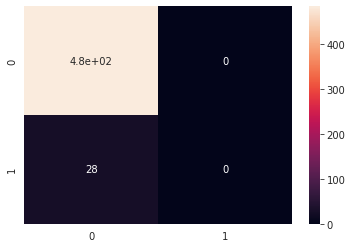

In [240]:
# we want to have a look at how well the classifiers have performed, so we will use confusion matrix
#Which will give us the amount of values for: True Positives, False Positives, True Negatives, False Negatives
stroke_cm_test_forest = metrics.confusion_matrix(stroke_Y_test,stroke_Y_test_forest)
print(stroke_cm_test_forest)
sns.heatmap(stroke_cm_test_forest, annot=True)

####Classification Accuracy Score

In [241]:
#getting the accuracy score of model trained on testing data
stroke_acc_test_forest = metrics.accuracy_score(stroke_Y_test,stroke_Y_test_forest)
stroke_acc_test_forest

0.9452054794520548

In [242]:
#We will use the classification_report function on the metrics module to get a more detailed picture of our classification score
print("forest classification:\n%s" % metrics.classification_report(stroke_Y_test, stroke_Y_test_forest))

Tree classification:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
